# GTHA housing market database
# OSEMN methodology Step 2: Scrub
# Step 2.3 addition of new attributes to the Teranet dataset 
# (excluding records with  `consideration_amt` < 10'000)

---

This notebook describes Step 2.3 (part of _Step 2: Scrub_ of OSEMN methodology) performed on the Teranet dataset.

It is identical to the notebook `notebooks/2.scrub/2.3_teranet_new_cols.ipynb`, with the only difference being that prior to the addition of new attributes, **all records with missing `consideration_amt` are removed from the dataset.** In addition, **all values of `consideration_amt` less than 10'000 CAD are reset to NaN,** to exclude transactions with unreasonably low `consideration_amt`.

**_Surrogate key_** `transaction_id` is added prior to the removal of any records, so that the keys match between both versions of the Teranet dataset -- the one with unmodified `consideration_amt` and the one where records with `consideration_amt` < 10'000 CAD have been dropped.

Step 2.3 focuses on the addition of several new attributes to the Teranet dataset. Plan for the addition of the new attributes is presented below.

Previous steps included: 

* **Step 2.1:** spatial join between the Teranet points and the polygons of GTHA Dissemination Areas (DAs)
    
    * During step 2.1, Teranet records whose coordinates fall outside of the GTHA boundary (as defined by the DA geometry) have been filtered out (6,803,691 of the original 9,039,241 Teranet records remain in the dataset)
     
    * In addition to that, three new columns (`OBJECTID`, `DAUID`, and `CSDNAME`) derived from DA attributes have been added to each Teranet transaction

    * for details, see `notebooks/2.scrub/2.1_teranet_gtha_spatial_join.ipynb`

* **Step 2.2:** correction for consistency of the Teranet records

    * column names were converted to lower case
    
    * inconsistent capitalizations were fixed for columns
    
        * `municipality`    
        * `street_name`
        * `street_designation`
        * `postal_code` (did not show problems, converted as a preventive measure)
        
    * columns `province` and `street_suffix` were removed from the dataset
    
    * new column `street_name_raw` was created: reserve copy of unmodified `street_name`
    
    * column `street_name` was parsed and cleaned for:
    
        * `postal_code`
        * `unitno`
        * `street_number`
        * `street_direction`
        * `street_designation`
        
    * plots of the count and percentage of missing values per column were produced
    
    * inconsistent entries were fixed in the following columns:
        
        * `street_direction`
        * `street_designation`
        * `municipality`
        * `street_name`
        * `unitno`
        
    * for details, see `notebooks/2.scrub/2.2_teranet_consistency.ipynb`

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.

For background information, description of the Teranet dataset, and its attributes, see `methodology/1.obtain/obtain.pdf`.

For description of _Step 2: Scrub_ of OSEMN methodology, see `methodology/2.scrub/scrub.pdf`.

For description of the cleanup plan for the Teranet dataset, see `methodology/2.scrub/teranet_cleanup_plan.pdf`.

For description of Step 2.1 of the cleanup process, see `notebooks/2.scrub/2.1_teranet_gtha_spatial_join.ipynb`.

For description of Step 2.2 of the cleanup process, see `notebooks/2.scrub/2.2_teranet_consistency.ipynb`.

## Plan for the addition of the new attributes

**All Teranet records with missing `consideration_amt` are removed from the dataset.** The rest of this notebook is identical to the notebook `notebooks/2.scrub/2.3_teranet_new_cols`. **_Surrogate key_** `transaction_id` is added prior to the removal of any records, so that the keys match between both versions of the Teranet dataset -- the one with unmodified `consideration_amt` and the one where records with `consideration_amt` < 10'000 CAD have been dropped.

### Previously added attributes

Previously, the following new attributes were created in the Teranet dataset:

* attributes produced from the spatial join with DA geometry:

    * `objectid`: an identifier for Dissemination Areas (DAs), added as a backup identifier for DAs

    * `dauid`: another identifier for Dissemination Areas, indented to be used as the **_foreign key_** linking Teranet records with DAs (will become the **_primary key_** of DA-level datasets (_e.g.,_ DA-level Census data)
    
    * `csdname`: municipality name according to Census data (DA-level)

These attributes were added to each Teranet record via a spatial join of Teranet points with the polygons of Dissemination Areas (DAs) during Step 2.1 of the cleanup process

* attributes produced during the correction of Teranet records for consistency:

    * `street_name_raw`: unmodified reserve copy of the original `street_name` from the Teranet dataset

### Attributes to be added in this step

In this step, the following attributes will be added to the Teranet dataset:

* surrogate key:

    * `transaction_id`: unique identifier for each Teranet transaction 
    
Essentially, a simple range index, which represents the row number of a record in the full Teranet dataset (filtered to include only GTHA records), ordered by date (from earliest to latest) and `pin`
    
* attributes for display

    * `date_disp`: `registration_date` converted to `datetime.date` data type to exclude the timestamp (original `registration_date` is stored in NumPy's `datetime64` format to allow more efficient datetime operations)
    
    * `price_disp`: `consideration_amt` formatted to include thousands separator (_e.g.,_ '3,455,122') and stored as a string, for display purposes
    
* attributes for record grouping
    
    * `year`: year parsed from `registration_date`, to simplify record grouping
    
    * `year_month`: year and month parsed from `registration_date`, to simplify record grouping
    
    * `year3`: `registration_date` parsed for 3-year intervals (_e.g.,_ '2014-2016'), to simplify record grouping
    
    * `year5`: `registration_date` parsed for 5-year intervals (_e.g.,_ '2012-2016'), to simplify record grouping
    
    * `year10`: `registration_date` parsed for 3-year intervals (_e.g.,_ '2007-2017'), to simplify record grouping
    
    * `xy`: `x` and `y` coordinates concatenated together (_e.g.,_ '43.098324_-79.234235'), can be used to identify and group records by their coordinate pairs
    
* correction of `consideration_amt` for inflation    
    
    * `price_infl`: `consideration_amt` corrected for inflation
    
* exploratory attributes

    * `pin/xy_total_sales`: total records for this `pin`/`xy`

    * `pin/xy_prev_sales`: previous records from this `pin`/`xy` (not counting current transaction)

    * `pin/xy_price_cum_sum`: cumulative price of all records to date from this `pin`/`xy`

    * `pin/xy_price_pct_change`: price percentage change compared to previous record from this `pin`/`xy`

    * `price_da_pct_change`: price percentage change compared to previous record from this DA (by `da_id`)

    * `pin/xy_years_since_last_sale`: years since last sale from this `pin`/`xy`

    * `da_days_since_last_sale`, `da_years_since_last_sale`: days or years since last sale from this DA (by `da_id`)

    * `sale_next_6m/1y/3y`: "looks into the future" to see whether there is another transaction from this `pin`/`xy` within the given time horizon (6 months, 1 year, 3 years)
    

## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import os
from time import time

sns.set()

In [2]:
data_path = '../../data/teranet/'
os.listdir(data_path)

['3_Teranet_new_cols.csv',
 'epoi_gtha13',
 '2_Teranet_consistent.csv',
 '1.2_Teranet_DA_TAZ_cols.csv',
 '1.1_Teranet_DA_cols.csv',
 '1.3_Teranet_DA_TAZ_LU.csv',
 'ParcelLandUse.zip',
 'ParcelLandUse',
 'HHSaleHistory.csv',
 '3_Teranet_nonan_new_cols.csv',
 'GTAjoinedLanduseSales']

## Load Teranet data

In [3]:
t = time()

df = pd.read_csv(data_path + '2_Teranet_consistent.csv',
                 parse_dates=['registration_date'], low_memory=False)
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:,.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 1,144.37 seconds (19.07 minutes)
with 6,803,767 rows
and 21 columns
-- Column names:
 Index(['lro_num', 'pin', 'consideration_amt', 'registration_date',
       'postal_code', 'unitno', 'street_name', 'street_designation',
       'street_direction', 'municipality', 'street_number', 'x', 'y', 'dauid',
       'csduid', 'csdname', 'taz_o', 'pin_lu', 'landuse', 'prop_code',
       'street_name_raw'],
      dtype='object')


In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803767 entries, 0 to 6803766
Data columns (total 21 columns):
lro_num               6803767 non-null int64
pin                   6803767 non-null int64
consideration_amt     6803767 non-null float64
registration_date     6803767 non-null datetime64[ns]
postal_code           6233378 non-null object
unitno                1572961 non-null object
street_name           6598370 non-null object
street_designation    6522471 non-null object
street_direction      683462 non-null object
municipality          6799752 non-null object
street_number         6594376 non-null object
x                     6803767 non-null float64
y                     6803767 non-null float64
dauid                 6803767 non-null int64
csduid                6803767 non-null int64
csdname               6803767 non-null object
taz_o                 6802628 non-null float64
pin_lu                6491804 non-null float64
landuse               6009136 non-null float64
prop

## Surrogate key

### Add attribute `transaction_id`
Attribute `transaction_id` is intended as a unique identifier for each record in the Teranet dataset. It will be used as the **_primary key_** for records in Teranet table in the proposed GTHA housing market database. It is produced as a surrogate key, as no other attribute or combination of attributes in the Teranet dataset allows the records to be uniquely identified. 
    
`transaction_id` is essentially a simple range index, which represents the row number of a record in the full Teranet dataset (filtered to include only GTHA records), ordered by date (from earliest to latest) and `pin`

**_Surrogate key_** `transaction_id` is added prior to the removal of any records, so that the keys match between both versions of the Teranet dataset -- the one with unmodified `consideration_amt` and the one where records with `consideration_amt` < 10'000 CAD have been dropped.

#### Order Teranet records by `registration_date` and `pin`

In [5]:
df = df.sort_values(['registration_date', 'pin'])
print("DataFrame was resorted by 'registration_date' and 'pin'.")

DataFrame was resorted by 'registration_date' and 'pin'.


#### Insert the new column `transaction_id`

In [6]:
df.insert(0, "transaction_id", np.arange(len(df)))
print("New column 'transaction_id' was added to the DataFrame.")

New column 'transaction_id' was added to the DataFrame.


## Reset all values of `consideration_amt` < 10'000 CAD to NaN
All values of `consideration_amt` less than 10'000 CAD are reset to NaN. The boundary of 10'000 CAD has been selected fairly arbitrary, to cut off the spike of records with low values from the distribution of `consideration_amt` (presented below). On the charts below, values of `consideration_amt` greater than 1'000'000 are not displayed, but they are left in the Teranet dataset, only the values with low `consideration_amt` are removed.

#### Distribution of `consideration_amt`, from 0 to 2'000'000 CAD

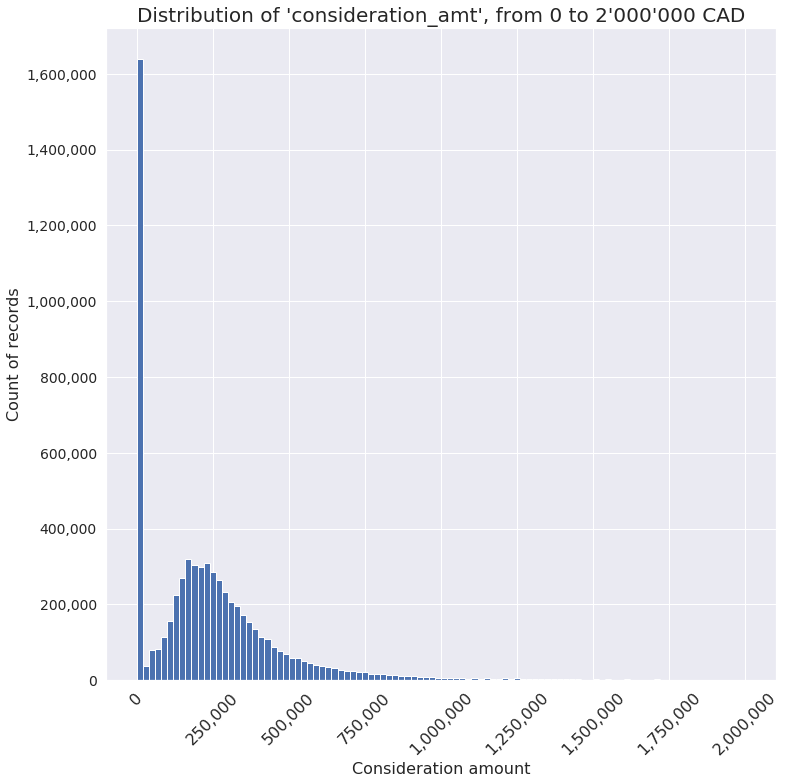

In [7]:
%matplotlib inline
ax = df.query('consideration_amt < 2000000')['consideration_amt']\
    .hist(bins=100, figsize=(12,12))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("Consideration amount", fontsize=16)
ax.set_ylabel("Count of records", fontsize=16)
ax.set_title("Distribution of 'consideration_amt', from 0 to 2'000'000 CAD", fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('results/teranet_price_dist.png', dpi=300, bbox_inches='tight')

#### Distribution of `consideration_amt`, from 10'000 to 2'000'000 CAD

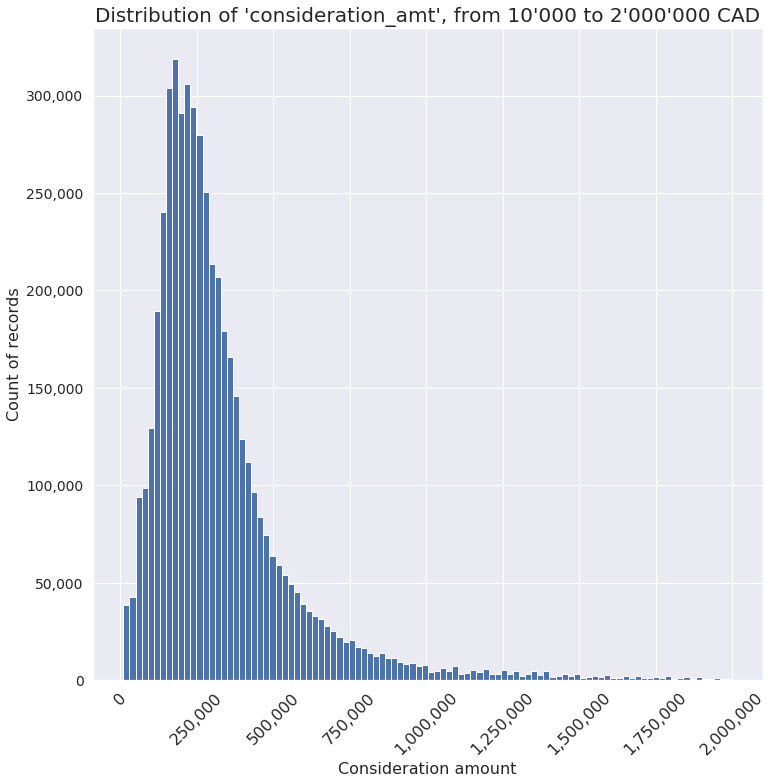

In [8]:
ax = df.query('consideration_amt < 2000000 & consideration_amt > 10000')['consideration_amt']\
    .hist(bins=100, figsize=(12,12))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel("Consideration amount", fontsize=16)
ax.set_ylabel("Count of records", fontsize=16)
ax.set_title("Distribution of 'consideration_amt', from 10'000 to 2'000'000 CAD", fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('results/teranet_10000_price_dist.png', dpi=300, bbox_inches='tight')

#### Reset all values of `consideration_amt` < 10'000 to NaN
To eliminate the spike on the distribution of `consideration_amt` corresponding to records with unreasonably low values, all values of `consideration_amt` < 10'000 are reset to NaN. Records with `consideration_amt` > 2'000'000 are left in the Teranet dataset.

In [9]:
min_price = 10000
mask = df['consideration_amt'] < min_price
df.loc[mask, 'consideration_amt'] = np.nan
print("Values of 'consideration_amt' of all records with price under {0:,} CAD were set to NaN!"
     .format(min_price) + 
      "\n{0:,} values ({1:.2f}% of the total) have been reset to NaN."
      .format(len(df) - df['consideration_amt'].count(),
              (len(df) - df['consideration_amt'].count()) / len(df) * 100) +
      "\n'consideration_amt' now has {0:,} non-null entries."
       .format(df['consideration_amt'].count()))

Values of 'consideration_amt' of all records with price under 10,000 CAD were set to NaN!
1,615,244 values (23.74% of the total) have been reset to NaN.
'consideration_amt' now has 5,188,523 non-null entries.


## Drop all records with missing `consideration_amt`
All records with missing `consideration_amt` are removed from the Teranet dataset.

In [10]:
old_len = len(df)
df = df.dropna(subset=['consideration_amt'])
print("{0:,} records ({1:,.2f}% of the total) with missing 'consideration_amt'"
      .format(old_len - len(df), (old_len - len(df)) / old_len * 100) +
      " have been removed from the dataset.\n{0:,} records remaining."
      .format(len(df)))

1,615,244 records (23.74% of the total) with missing 'consideration_amt' have been removed from the dataset.
5,188,523 records remaining.


In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5188523 entries, 793520 to 1218646
Data columns (total 22 columns):
transaction_id        5188523 non-null int64
lro_num               5188523 non-null int64
pin                   5188523 non-null int64
consideration_amt     5188523 non-null float64
registration_date     5188523 non-null datetime64[ns]
postal_code           4881922 non-null object
unitno                1332616 non-null object
street_name           5144069 non-null object
street_designation    5090461 non-null object
street_direction      550657 non-null object
municipality          5187171 non-null object
street_number         5142798 non-null object
x                     5188523 non-null float64
y                     5188523 non-null float64
dauid                 5188523 non-null int64
csduid                5188523 non-null int64
csdname               5188523 non-null object
taz_o                 5188037 non-null float64
pin_lu                4947273 non-null float64
l

## Attributes for display

### Add attribute `date_disp`
Since Teranet records do not carry any actual timestamp (each record has a timestamp of '00:00:00'), a new column `date_disp` is created from `registration_date` to show only dates. The new column `date_disp` has a data type of `datetime.date`, while the original column `registration_date` is stored in NumPy's `datetime64` data type, which allows more efficient datetime operations.

In [12]:
df['date_disp'] = df['registration_date'].dt.date
print("New column 'date_disp' was added to the DataFrame.")

New column 'date_disp' was added to the DataFrame.


### Add attribute `price_disp`
A new column `price_disp` is created from values of `consideration_amt` formatted to include thousands separator (_e.g.,_ '3,455,122') and stored as a string, for display purposes.

In [13]:
df['price_disp'] = df['consideration_amt'].apply(lambda x: '{:,}'.format(x))
print("New column 'price_disp' was added to the DataFrame.")

New column 'price_disp' was added to the DataFrame.


## Add attribute `year`
The new attribute `year` is parsed from `registration_date` and stored as a string, to simplify record grouping.

In [14]:
df['year'] = df['date_disp'].astype('str').apply(lambda x: x[:4])
print("New column 'year' was added to the DataFrame.")

New column 'year' was added to the DataFrame.


## Add attribute `year_month`
The new attribute `year_month` is parsed from `date_disp` and stored as a string, to simplify record grouping.

In [15]:
df['year_month'] = df['date_disp'].astype('str').apply(lambda x: x[:7])
print("New column 'year_month' was added to the DataFrame.")

New column 'year_month' was added to the DataFrame.


## Add attribute `year3`
The new attribute `year3` is created from the column `year` parsed for 3-year intervals (_e.g.,_ '2014-2016') and stored as a string, to simplify record grouping.

In [16]:
t = time()

df['year3'] = df['year']

year_list = df['year'].unique()

i = 0
ylist = []
for year in year_list:
    ylist.append(year)
    i += 1
    if i == 3:
        df['year3'] = df['year3'].str.replace('^' + ylist[0] + '$|^' + ylist[1] + '$|^' + ylist[2] + '$', 
                                              ylist[0] + '-' + ylist[2])
        ylist = []
        i = 0

elapsed = time() - t

print("New column 'year3' was added to the DataFrame. Took {0:,.2f} seconds ({1:.2f} minutes)."
      .format(elapsed, elapsed / 60))
df['year3'].value_counts().sort_index()

New column 'year3' was added to the DataFrame. Took 307.12 seconds (5.12 minutes).


1865-1872         6
1873-1876         7
1877-1880         6
1882-1884         8
1885-1887         8
1888-1890        27
1891-1895        10
1897-1900        20
1901-1903        14
1904-1906        10
1907-1909        28
1910-1912        63
1913-1915        56
1916-1918        44
1919-1921        65
1922-1924        85
1925-1927        76
1928-1930        95
1931-1933        56
1934-1936        82
1937-1939        78
1940-1942        60
1943-1945        67
1946-1948       129
1949-1951       407
1952-1954       731
1955-1957       927
1958-1960       894
1961-1963       963
1964-1966      1148
1967-1969      1001
1970-1972      1024
1973-1975       807
1976-1978      1154
1979-1981      1507
1982-1984      1042
1985-1987     91732
1988-1990    213381
1991-1993    249801
1994-1996    330850
1997-1999    466381
2000-2002    562066
2003-2005    656825
2006-2008    655583
2009-2011    629142
2012-2014    638766
2015-2017    681291
Name: year3, dtype: int64

## Add attribute `year5`
The new attribute `year5` is created from the column `year` parsed for 5-year intervals (_e.g.,_ '2012-2016') and stored as a string, to simplify record grouping.

In [17]:
t = time()

df['year5'] = df['year']

year_list = df['year'].unique()[1:] # skipping first year (1805) to match the length of a 5-year window

i = 0
ylist = []
for year in year_list:
    ylist.append(year)
    i += 1
    if i == 5:
        df['year5'] = df['year5'].str.replace('^' + ylist[0] + '$|^' + ylist[1] + '$|^' + ylist[2] + '$|^' +
                                              ylist[3] + '$|^' + ylist[4] + '$', 
                                              ylist[0] + '-' + ylist[4])
        ylist = []
        i = 0

elapsed = time() - t

print("New column 'year5' was added to the DataFrame. Took {0:,.2f} seconds ({1:.2f} minutes)."
      .format(elapsed, elapsed / 60))
df['year5'].value_counts().sort_index()

New column 'year5' was added to the DataFrame. Took 183.39 seconds (3.06 minutes).


1865               1
1871-1876         12
1877-1883         10
1884-1888         18
1889-1895         31
1897-1902         29
1903-1907         25
1908-1912         81
1913-1917         93
1918-1922        101
1923-1927        132
1928-1932        140
1933-1937        136
1938-1942         95
1943-1947        152
1948-1952        650
1953-1957       1459
1958-1962       1502
1963-1967       1855
1968-1972       1673
1973-1977       1692
1978-1982       2224
1983-1987      92326
1988-1992     382246
1993-1997     565976
1998-2002     874257
2003-2007    1110607
2008-2012    1036284
2013-2017    1114716
Name: year5, dtype: int64

## Add attribute `year10`
The new attribute `year10` is created from the column `year` parsed for 5-year intervals (_e.g.,_ '2014-2017') and stored as a string, to simplify record grouping.

In [18]:
t = time()

df['year10'] = df['year']

year_list = df['year'].unique()[1:] # skipping first year (1805) to match the length of a 10-year window

i = 0
ylist = []
for year in year_list:
    ylist.append(year)
    i += 1
    if i == 10:
        df['year10'] = df['year10'].str.replace('^' + ylist[0] + '$|^' + ylist[1] + '$|^' + ylist[2] + '$|^' +
                                                ylist[3] + '$|^' + ylist[4] + '$|^' + ylist[5] + '$|^' + ylist[6] +
                                                '$|^' + ylist[7] + '$|^' + ylist[8] + '$|^' + ylist[9] + '$', 
                                                ylist[0] + '-' + ylist[9])
        ylist = []
        i = 0

elapsed = time() - t

print("New column 'year10' was added to the DataFrame. Took {0:,.2f} seconds ({1:.2f} minutes)."
      .format(elapsed, elapsed / 60))
df['year10'].value_counts().sort_index()

New column 'year10' was added to the DataFrame. Took 93.34 seconds (1.56 minutes).


1865               1
1871-1883         22
1884-1895         49
1897-1907         54
1908-1917        174
1918-1927        233
1928-1937        276
1938-1947        247
1948-1957       2109
1958-1967       3357
1968-1977       3365
1978-1987      94550
1988-1997     948222
1998-2007    1984864
2008-2017    2151000
Name: year10, dtype: int64

### Add attribute `xy`

The new attribute `xy` is produced by concatenating `x` and `y` together (_e.g.,_ '-79.9774202446447_43.203290987723'), it can be used to identify and group records by their coordinate pairs.

In [19]:
df['xy'] = df['x'].astype('str') + '_' + df['y'].astype('str')
print("New column 'xy' was added to the DataFrame.")

New column 'xy' was added to the DataFrame.


## Correction of `consideration_amt` for inflation

## Exploratory attributes

### Add column `total_sales`
Total records for each pin, generated as a separate DataFrame `df_pin` which represents Teranet records grouped and indexed by `pin`.

`total_sales_pin` is added as a new column for Teranet records via a merge operation on `pin`.

In [20]:
# group records by `pin`
t = time()
pin_counts = \
    df.groupby('pin')['consideration_amt'].count()
pin_counts.name = 'pin_total_sales'
df = pd.merge(df, pin_counts, on='pin')
elapsed = time() - t
print("\nNew column 'pin_total_sales' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

# group records by `xy` coordinate pairs
t = time()
xy_counts = \
    df.groupby('xy')['consideration_amt'].count()
xy_counts.name = 'xy_total_sales'
df = pd.merge(df, xy_counts, on='xy')
elapsed = time() - t
print("\nNew column 'xy_total_sales' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))


New column 'pin_total_sales' added to the DataFrame!
took 28.78 seconds.

New column 'xy_total_sales' added to the DataFrame!
took 28.24 seconds.


### Add column `prev_sales`
New columns are added to Teranet records capturing, for each transaction, a rolling count of previous records from this `pin` or `xy` coordinate pair.

In [21]:
df['count'] = 1 # used to produce rolling counts per `pin` and `xy`

# group by `pin`
t = time()
df['pin_prev_sales'] = \
    df.sort_values(['pin', 'registration_date'])\
    .groupby('pin')['count'].cumsum() - 1
elapsed = time() - t
print("\nNew column 'pin_prev_sales' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

# group by xy pairs
t = time()
df['xy_prev_sales'] = \
    df.sort_values(['xy', 'registration_date'])\
    .groupby('xy')['count'].cumsum() - 1
elapsed = time() - t
print("\nNew column 'xy_prev_sales' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

df = df.drop('count', axis=1)


New column 'pin_prev_sales' added to the DataFrame!
took 18.88 seconds.

New column 'xy_prev_sales' added to the DataFrame!
took 19.59 seconds.


### Add columns `price_cum_sum` and `price_pct_change`
New columns are added to Teranet records capturing, for each transaction, a rolling sum of price from previous records from this `pin` or `xy` coordinate pair, and `pct_change` compared to previous transaction from this `pin` or `xy` pair.

In [22]:
# `price_cum_sum`
# group records by `pin`
t = time()
df['pin_price_cum_sum'] = \
    df.sort_values(['pin', 'registration_date'])\
    .groupby('pin')['consideration_amt'].cumsum()
elapsed = time() - t
print("\nNew column 'pin_price_cum_sum' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))
# group records by `xy` pairs
t = time()
df['xy_price_cum_sum'] = \
    df.sort_values(['xy', 'registration_date'])\
    .groupby('xy')['consideration_amt'].cumsum()
elapsed = time() - t
print("\nNew column 'xy_price_cum_sum' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

# `price_pct_change`
# group records by `pin`
t = time()
df['pin_price_pct_change'] = \
    df.sort_values(['pin', 'registration_date'])\
    .groupby('pin')['consideration_amt'].pct_change()
elapsed = time() - t
print("\nNew column 'pin_price_pct_change' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))
# group records by `xy`
t = time()
df['xy_price_pct_change'] = \
    df.sort_values(['xy', 'registration_date'])\
    .groupby('xy')['consideration_amt'].pct_change()
elapsed = time() - t
print("\nNew column 'xy_price_pct_change' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))


New column 'pin_price_cum_sum' added to the DataFrame!
took 9.99 seconds.

New column 'xy_price_cum_sum' added to the DataFrame!
took 19.03 seconds.

New column 'pin_price_pct_change' added to the DataFrame!
took 11.75 seconds.

New column 'xy_price_pct_change' added to the DataFrame!
took 19.31 seconds.


## Add column `price_da_pct_change`
New column is added to Teranet records capturing, for each transaction, percentage change in price compared to the previous record from this `da_id`.

In [23]:
# add column 'price_da_pct_change' to Teranet records DataFrame 
t = time()
df['price_da_pct_change'] = \
    df.sort_values(['dauid', 'registration_date'])\
    .groupby('dauid')['consideration_amt'].pct_change()
elapsed = time() - t
print("\nNew column 'price_da_pct_change' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))


New column 'price_da_pct_change' added to the DataFrame!
took 8.41 seconds.


## Add columns `years_since_last_sale`
New columns are added to Teranet records capturing, for each transaction, years passed since the previous record from this `pin` or `xy` coordinate pair.

In [24]:
t = time()
df['pin_years_since_last_sale'] = \
    df.sort_values(['pin', 'registration_date'])\
      .groupby('pin')['registration_date']\
        .diff().dt.days / 365
elapsed = time() - t
print("New column 'pin_years_since_last_sale' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

New column 'pin_years_since_last_sale' added to the DataFrame!
took 1131.07 seconds (18.85 minutes).


In [25]:
t = time()
df['xy_years_since_last_sale'] = \
    df.sort_values(['xy', 'registration_date'])\
      .groupby('xy')['registration_date']\
        .diff().dt.days / 365
elapsed = time() - t
print("New column 'xy_years_since_last_sale' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

New column 'xy_years_since_last_sale' added to the DataFrame!
took 657.23 seconds (10.95 minutes).


## Add columns `da_days_since_last_sale` and `da_years_since_last_sale`
New columns are added to Teranet records capturing, for each transaction, years passed since the previous record from this `pin` or `xy` coordinate pair.

In [26]:
# add column 'da_days_since_last_sale' to Teranet records DataFrame 
t = time()
df['da_days_since_last_sale'] = \
    df.sort_values(['dauid', 'registration_date'])\
      .groupby('dauid')['registration_date']\
        .diff().dt.days
elapsed = time() - t
print("New column 'da_days_since_last_sale' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))
# add column 'da_years_since_last_sale' to Teranet records DataFrame 
t = time()
df['da_years_since_last_sale'] = \
    df.sort_values(['dauid', 'registration_date'])\
      .groupby('dauid')['registration_date']\
        .diff().dt.days / 365
elapsed = time() - t
print("New column 'da_years_since_last_sale' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

New column 'da_days_since_last_sale' added to the DataFrame!
took 14.00 seconds.
New column 'da_years_since_last_sale' added to the DataFrame!
took 13.40 seconds.


## Add columns `sale_next_6m/1y/3y` per `pin` and `xy`
New columns are added to Teranet records capturing, for each transaction, whether there would be another transaction in the future from this `pin`, `xy`, or `da_id`

Time horizons used: 6 months, 1 year, 3 years.

In [27]:
# create a new column, marks True if next 'day_diff' <= 5
# group records by `pin`
t = time()
df = df.sort_values(['pin', 'registration_date'])
df['pin_sale_next_6m'] = \
    df['pin_years_since_last_sale'].shift(-1) <= 0.5
df['pin_sale_next_1y'] = \
    df['pin_years_since_last_sale'].shift(-1) <= 1
df['pin_sale_next_3y'] = \
    df['pin_years_since_last_sale'].shift(-1) <= 3
elapsed = time() - t
print("New columns 'pin_sale_next_..' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

# group records by `xy`
t = time()
df = df.sort_values(['xy', 'registration_date'])
df['xy_sale_next_6m'] = \
    df['xy_years_since_last_sale'].shift(-1) <= 0.5
df['xy_sale_next_1y'] = \
    df['xy_years_since_last_sale'].shift(-1) <= 1
df['xy_sale_next_3y'] = \
    df['xy_years_since_last_sale'].shift(-1) <= 3
elapsed = time() - t
print("New columns 'xy_sale_next_..' "
      "added to the DataFrame!"
      "\ntook {0:.2f} seconds.".format(elapsed))

New columns 'pin_sale_next_..' added to the DataFrame!
took 8.31 seconds.
New columns 'xy_sale_next_..' added to the DataFrame!
took 11.44 seconds.


## Price correction for inflation
Transaction prices are corrected for inflation to 2016 prices using the guidelines provided in the [Inflation Calculator](https://www.bankofcanada.ca/rates/related/inflation-calculator/) supplied by the Bank of Canada.

### Load correction coefficients

In [28]:
infl_coefs = pd.read_excel(data_path + '../misc/Infl_adjustment.xlsx')
infl_coefs = infl_coefs.T
infl_coefs.columns = infl_coefs.iloc[0]
infl_coefs = infl_coefs.drop('YEAR')
print(infl_coefs.iloc[0])
infl_coefs = infl_coefs.iloc[:, 0]
infl_coefs

YEAR
Percentage change compared to 2016 prices (X)                            104.92
Inflation adjusted value =                                        ((X/100)+1)*Y
NaN                                              where Y = value to be adjusted
Name: 1985, dtype: object


1985    104.92
1986      97.4
1987     88.47
1988     81.32
1989     72.36
1990     65.09
1991     55.35
1992     53.69
1993     51.17
1994     51.17
1995     47.21
1996     45.06
1997     42.65
1998     41.25
1999     38.97
2000     35.18
2001      30.8
2002     29.23
2003     25.95
2004     22.84
2005     20.77
2006      17.9
2007     15.37
2008     11.87
2009     12.16
2010      11.1
2011      7.76
2012      6.17
2013      4.96
2014      2.54
2015      1.49
2016         0
2017        -1
2018     -3.37
2019     -5.28
Name: Percentage change compared to 2016 prices (X), dtype: object

### Correct consideration amount for inflation

In [29]:
year_list = infl_coefs.index
for year in year_list:
    mask1 = df['year'] == str(year)
    mask2 = df['consideration_amt'].isnull()
    price_raw = df.loc[mask1 & ~mask2, 'consideration_amt']
    df.loc[mask1 & ~mask2, 'price_2016'] = ((infl_coefs[year] / 100) + 1) * price_raw
    print("Corrected prices from {0} for inflation.".format(year))

Corrected prices from 1985 for inflation.
Corrected prices from 1986 for inflation.
Corrected prices from 1987 for inflation.
Corrected prices from 1988 for inflation.
Corrected prices from 1989 for inflation.
Corrected prices from 1990 for inflation.
Corrected prices from 1991 for inflation.
Corrected prices from 1992 for inflation.
Corrected prices from 1993 for inflation.
Corrected prices from 1994 for inflation.
Corrected prices from 1995 for inflation.
Corrected prices from 1996 for inflation.
Corrected prices from 1997 for inflation.
Corrected prices from 1998 for inflation.
Corrected prices from 1999 for inflation.
Corrected prices from 2000 for inflation.
Corrected prices from 2001 for inflation.
Corrected prices from 2002 for inflation.
Corrected prices from 2003 for inflation.
Corrected prices from 2004 for inflation.
Corrected prices from 2005 for inflation.
Corrected prices from 2006 for inflation.
Corrected prices from 2007 for inflation.
Corrected prices from 2008 for inf

## Save results to a new .csv file
Teranet dataset without NaN records and with new columns is saved as:
`data/HHSaleHistory_cleaned_v0.9_GTHA_DA_with_cols_v0.9.csv`

In [30]:
df.columns

Index(['transaction_id', 'lro_num', 'pin', 'consideration_amt',
       'registration_date', 'postal_code', 'unitno', 'street_name',
       'street_designation', 'street_direction', 'municipality',
       'street_number', 'x', 'y', 'dauid', 'csduid', 'csdname', 'taz_o',
       'pin_lu', 'landuse', 'prop_code', 'street_name_raw', 'date_disp',
       'price_disp', 'year', 'year_month', 'year3', 'year5', 'year10', 'xy',
       'pin_total_sales', 'xy_total_sales', 'pin_prev_sales', 'xy_prev_sales',
       'pin_price_cum_sum', 'xy_price_cum_sum', 'pin_price_pct_change',
       'xy_price_pct_change', 'price_da_pct_change',
       'pin_years_since_last_sale', 'xy_years_since_last_sale',
       'da_days_since_last_sale', 'da_years_since_last_sale',
       'pin_sale_next_6m', 'pin_sale_next_1y', 'pin_sale_next_3y',
       'xy_sale_next_6m', 'xy_sale_next_1y', 'xy_sale_next_3y', 'price_2016'],
      dtype='object')

In [31]:
save_path = data_path + '3_Teranet_nonan_new_cols.csv'
t = time()
df.to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds ({1:.2f} minutes).".format(elapsed, elapsed / 60))

DataFrame saved to file:
 ../../data/teranet/3_Teranet_nonan_new_cols.csv 
took 327.29 seconds (5.45 minutes).
